# LOGISTIC REGRESSION GRADIENT DESCENT MODEL

In [1032]:
#import libraries python
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1033]:
#display csv dataset
df = pd.read_csv("categories.csv")
#remove cat_label column
del df['cat_label']
#remove University-name column
del df['University-name']
#remove State column
del df['State']
data = np.array(df)
df['categories'] = df['categories'].astype('category').cat.codes
data = np.array(df)
np.random.shuffle(data)
# 80%/20% train/test split dataset 
num_train = int(.8 *len(data))  
x_train, y_train = data[:num_train, :-1], data[:num_train, -1]
x_test, y_test = data[num_train:, :-1], data[num_train:, -1]
X=x_train[:,:15]

y=y_train
y=y.reshape(len(X),1)


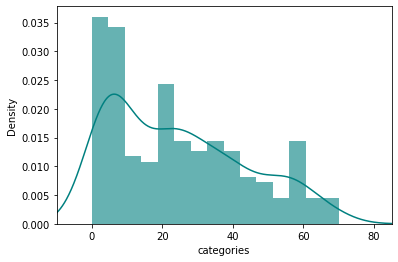

In [1034]:
ax = df["categories"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["categories"].plot(kind='density', color='teal')
ax.set(xlabel='categories')
plt.xlim(-10,85)
plt.show()


In [1059]:
#initialization the values of theta with random function 
theta = np.random.uniform(0.0001,-0.0006 ,size=15)
theta=theta.reshape((15, 1))

In [1178]:
#sigmoid function H(x)=1/1+exp(-z)
def sigmoid(x):
   
    return 1 / (1 + np.exp(-x))
#net_input =>z=theta*X
def net_input(theta, x):
   
    return np.dot(x, theta)
#probability =>sigmoid=1/1+exp(-theta*X)
def probability(theta, x):
   
    return sigmoid(net_input(theta, x))
#Cost Function=> (- (y *log (h(x)) + (1-y) *log (1- h(x))))
def cost_function(theta, x, y):
    
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum( y * np.log(probability(theta, x)) + (1 - y) *  np.log(1 - probability(theta, x)))
    return total_cost
#Gradient Descent algorithm
#theta=theta-alpha*1/m(h(X,theta)-y)*Xi
def gradientFunction(X,y,theta,max_iter,alpha):
    J_history=[]
    m=len(X)
    theta_temp=np.zeros((X.shape[1],1))
    for j in range(max_iter):
        for i in range(X.shape[1]):
            
            theta_temp[i]=theta[i]-(alpha)*(sum((sigmoid(np.dot(X,theta))-y)*X [:,i].reshape(len(X),1))*(1/m))
            
        theta[i] = theta_temp[i]
        
        J_history.append(cost_function(theta,X,y))
        print("theta=",theta)
        print("cost=",cost_function(theta,X,y))
    return theta,J_history


In [1185]:
#list of theta values and their cost (prediction error ) for each iteration
theta,cost= gradientFunction(X,y,theta,17,0.003)



theta= [[0.00435308]
 [0.00697743]
 [0.00620726]
 [0.00678591]
 [0.0075121 ]
 [0.00867149]
 [0.0020976 ]
 [0.00046902]
 [0.00515933]
 [0.00908465]
 [0.00137521]
 [0.00932585]
 [0.00863782]
 [0.00963563]
 [0.00291366]]
cost= 6.00868669193368
theta= [[0.00539721]
 [0.00119763]
 [0.00266475]
 [0.00413456]
 [0.00627876]
 [0.00569907]
 [0.00512145]
 [0.0069863 ]
 [0.00938177]
 [0.00917665]
 [0.00560079]
 [0.00629777]
 [0.00299571]
 [0.00328229]
 [0.00301393]]
cost= 4.995469475889248
theta= [[0.00877783]
 [0.00445296]
 [0.00287535]
 [0.00603048]
 [0.00834935]
 [0.00399453]
 [0.00665658]
 [0.00919407]
 [0.00777291]
 [0.00950269]
 [0.0084773 ]
 [0.00356346]
 [0.00614474]
 [0.00176752]
 [0.00906241]]
cost= 6.6318621730137455
theta= [[0.00351621]
 [0.00015874]
 [0.00143479]
 [0.00503839]
 [0.004276  ]
 [0.00069264]
 [0.00041125]
 [0.00646302]
 [0.00186352]
 [0.00935079]
 [0.00579801]
 [0.00147793]
 [0.00737828]
 [0.00777271]
 [0.00622463]]
cost= 4.809745582385806
theta= [[0.00036845]
 [0.0041511

In [1186]:
#list of cost (prediction error ) for each iteration
cost

[6.00868669193368,
 4.995469475889248,
 6.6318621730137455,
 4.809745582385806,
 4.7910790406850365,
 5.234507868291096,
 5.821103218219395,
 4.714757059545443,
 6.065386386485654,
 3.6028186518179655,
 6.279099279731592,
 4.260877758365362,
 4.289673231474389,
 4.108185278967038,
 4.983188956618771,
 4.814123938576366,
 6.434610607109669]

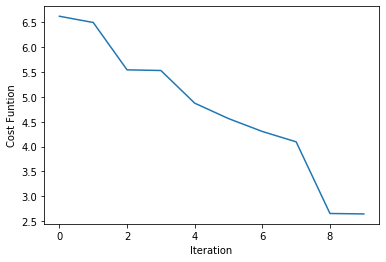

In [1184]:
#plot the cost function 
plt.plot (cost)
plt.xlabel('Iteration'); plt.ylabel('Cost Funtion');

In [1142]:
#Regularized logistic regression 
def gradientFunctionRegular(X,y,theta,max_iter,alpha,lambbda,c):
    m=len(X)
    theta_temp=np.zeros((X.shape[1],1))
    for j in range(max_iter):
        for i in range(X.shape[1]):
            if(i==0):
                theta_temp[0]=theta[0]-((alpha)*sum((sigmoid(np.dot(X,theta))-y)*X[:,0].reshape(len(X),1))*(1/m))
            else:
                theta_temp[i]=theta[i]-(alpha)*((sum((sigmoid(np.dot(X,theta))-y)*X[:,i].reshape(len(X),1))*(1/m))+((lambbda/m)*theta[i]))
        theta=theta_temp.copy()
    return theta

In [1092]:
#initialization the values of theta
multi_theta=np.zeros((len(set(list(y[:,0]))),X.shape[1]))

In [1093]:
#display gradientFunctionRegular for each class Y
for c in y:
    print(gradientFunctionRegular(X,(y==c)*1,theta,2,0.02,0.01,c))

[[-8.08221530e-02]
 [-5.12793644e-02]
 [-3.58493949e-01]
 [-5.36392884e-03]
 [-2.89265113e-01]
 [-2.80756113e-02]
 [-2.71641996e-02]
 [-2.72752727e-01]
 [-1.99022992e-02]
 [-2.73258513e-01]
 [-2.28336628e-02]
 [-1.87928653e-02]
 [-1.33283565e-01]
 [-1.20265879e-01]
 [ 7.85337797e+00]]
[[-8.25061298e-02]
 [-5.19108227e-02]
 [-3.67966932e-01]
 [-5.40817509e-03]
 [-2.87263983e-01]
 [-2.86137492e-02]
 [-2.77492062e-02]
 [-2.80646960e-01]
 [-2.02075292e-02]
 [-2.82100062e-01]
 [-2.31809252e-02]
 [-1.90664926e-02]
 [-1.36441209e-01]
 [-1.22371002e-01]
 [ 7.85085178e+00]]
[[-8.25061298e-02]
 [-5.19108227e-02]
 [-3.67966932e-01]
 [-5.40817509e-03]
 [-2.87263983e-01]
 [-2.86137492e-02]
 [-2.77492062e-02]
 [-2.80646960e-01]
 [-2.02075292e-02]
 [-2.82100062e-01]
 [-2.31809252e-02]
 [-1.90664926e-02]
 [-1.36441209e-01]
 [-1.22371002e-01]
 [ 7.85085178e+00]]
[[-8.29269542e-02]
 [-5.27528101e-02]
 [-3.70597879e-01]
 [-5.49566746e-03]
 [-2.95573059e-01]
 [-2.87593589e-02]
 [-2.78404361e-02]
 [-2.8148

 [ 7.85699152e+00]]
[[-8.16640494e-02]
 [-5.17003097e-02]
 [-3.62177570e-01]
 [-5.35755606e-03]
 [-2.94106166e-01]
 [-2.81115015e-02]
 [-2.71883499e-02]
 [-2.75173342e-01]
 [-2.01549023e-02]
 [-2.78836994e-01]
 [-2.30756692e-02]
 [-1.86454455e-02]
 [-1.33493874e-01]
 [-1.21318393e-01]
 [ 7.85274650e+00]]
[[-8.04011461e-02]
 [-5.08583348e-02]
 [-3.60073012e-01]
 [-5.24056369e-03]
 [-2.87154550e-01]
 [-2.76461541e-02]
 [-2.66813534e-02]
 [-2.69173875e-01]
 [-1.96812524e-02]
 [-2.75679656e-01]
 [-2.27810538e-02]
 [-1.85191926e-02]
 [-1.31388876e-01]
 [-1.20476429e-01]
 [ 7.85485163e+00]]
[[-7.59807588e-02]
 [-4.89639396e-02]
 [-3.46916986e-01]
 [-4.74375919e-03]
 [-2.73268709e-01]
 [-2.58854393e-02]
 [-2.52004735e-02]
 [-2.48543696e-01]
 [-1.85445010e-02]
 [-2.65681128e-01]
 [-2.13287381e-02]
 [-1.76035678e-02]
 [-1.23389573e-01]
 [-1.08897862e-01]
 [ 7.86327232e+00]]
[[-8.25061298e-02]
 [-5.19108227e-02]
 [-3.67966932e-01]
 [-5.40817509e-03]
 [-2.87263983e-01]
 [-2.86137492e-02]
 [-2.774

[[-7.59807588e-02]
 [-4.89639396e-02]
 [-3.46916986e-01]
 [-4.74375919e-03]
 [-2.73268709e-01]
 [-2.58854393e-02]
 [-2.52004735e-02]
 [-2.48543696e-01]
 [-1.85445010e-02]
 [-2.65681128e-01]
 [-2.13287381e-02]
 [-1.76035678e-02]
 [-1.23389573e-01]
 [-1.08897862e-01]
 [ 7.86327232e+00]]
[[-8.20849483e-02]
 [-5.23318088e-02]
 [-3.66913969e-01]
 [-5.43800937e-03]
 [-2.96836694e-01]
 [-2.84833031e-02]
 [-2.76051098e-02]
 [-2.77173018e-01]
 [-2.02581867e-02]
 [-2.79994544e-01]
 [-2.33703334e-02]
 [-1.90769862e-02]
 [-1.35177922e-01]
 [-1.22581462e-01]
 [ 7.85106237e+00]]
[[-8.33478369e-02]
 [-5.29632498e-02]
 [-3.70597410e-01]
 [-5.53555755e-03]
 [-3.00098517e-01]
 [-2.90106010e-02]
 [-2.80753950e-02]
 [-2.83804026e-01]
 [-2.06074756e-02]
 [-2.87046562e-01]
 [-2.36017871e-02]
 [-1.93400781e-02]
 [-1.38335532e-01]
 [-1.24265517e-01]
 [ 7.84937831e+00]]
[[-7.59807588e-02]
 [-4.89639396e-02]
 [-3.46916986e-01]
 [-4.74375919e-03]
 [-2.73268709e-01]
 [-2.58854393e-02]
 [-2.52004735e-02]
 [-2.4854

 [ 7.84832572e+00]]
[[-8.37690227e-02]
 [-5.25422651e-02]
 [-3.70071471e-01]
 [-5.47454743e-03]
 [-2.98625490e-01]
 [-2.86422265e-02]
 [-2.77259095e-02]
 [-2.79909572e-01]
 [-2.03443360e-02]
 [-2.82520552e-01]
 [-2.33492172e-02]
 [-1.93085316e-02]
 [-1.35809358e-01]
 [-1.23423489e-01]
 [ 7.85022034e+00]]
[[-8.27163926e-02]
 [-5.27527912e-02]
 [-3.72176730e-01]
 [-5.48125202e-03]
 [-2.98520232e-01]
 [-2.86202720e-02]
 [-2.77812405e-02]
 [-2.78646417e-01]
 [-2.03844837e-02]
 [-2.81467922e-01]
 [-2.34650071e-02]
 [-1.92453739e-02]
 [-1.36148417e-01]
 [-1.23407976e-01]
 [ 7.85025506e+00]]
[[-8.44003168e-02]
 [-5.35947493e-02]
 [-3.76386436e-01]
 [-5.54225955e-03]
 [-3.02729334e-01]
 [-2.91158107e-02]
 [-2.82049014e-02]
 [-2.83698443e-01]
 [-2.07127176e-02]
 [-2.88204113e-01]
 [-2.38332945e-02]
 [-1.94453036e-02]
 [-1.38335372e-01]
 [-1.25107534e-01]
 [ 7.84853628e+00]]
[[-8.16640494e-02]
 [-5.17003097e-02]
 [-3.62177570e-01]
 [-5.35755606e-03]
 [-2.94106166e-01]
 [-2.81115015e-02]
 [-2.718

 [ 7.84836049e+00]]
[[-8.35584436e-02]
 [-5.29632908e-02]
 [-3.69545010e-01]
 [-5.50874034e-03]
 [-2.99362069e-01]
 [-2.89354410e-02]
 [-2.80052449e-02]
 [-2.82225249e-01]
 [-2.06285393e-02]
 [-2.83783591e-01]
 [-2.37281397e-02]
 [-1.93190450e-02]
 [-1.37072460e-01]
 [-1.24055038e-01]
 [ 7.84958879e+00]]
[[-8.12431233e-02]
 [-5.17003733e-02]
 [-3.63756863e-01]
 [-5.30056845e-03]
 [-2.91995993e-01]
 [-2.78119970e-02]
 [-2.69076882e-02]
 [-2.68436768e-01]
 [-1.96391299e-02]
 [-2.74310961e-01]
 [-2.25704655e-02]
 [-1.87717920e-02]
 [-1.32862427e-01]
 [-1.20897411e-01]
 [ 7.85316748e+00]]
[[-7.59807588e-02]
 [-4.89639396e-02]
 [-3.46916986e-01]
 [-4.74375919e-03]
 [-2.73268709e-01]
 [-2.58854393e-02]
 [-2.52004735e-02]
 [-2.48543696e-01]
 [-1.85445010e-02]
 [-2.65681128e-01]
 [-2.13287381e-02]
 [-1.76035678e-02]
 [-1.23389573e-01]
 [-1.08897862e-01]
 [ 7.86327232e+00]]
[[-8.44003156e-02]
 [-5.35947485e-02]
 [-3.76386434e-01]
 [-5.54225957e-03]
 [-3.03150377e-01]
 [-2.91308477e-02]
 [-2.821

 [ 7.85485163e+00]]
[[-8.29268532e-02]
 [-5.31738104e-02]
 [-3.71123919e-01]
 [-5.47521682e-03]
 [-3.00098851e-01]
 [-2.87685196e-02]
 [-2.78567932e-02]
 [-2.79488384e-01]
 [-2.05022218e-02]
 [-2.84625669e-01]
 [-2.36755025e-02]
 [-1.92874631e-02]
 [-1.36440869e-01]
 [-1.23844504e-01]
 [ 7.84958880e+00]]
[[-8.29269542e-02]
 [-5.27528101e-02]
 [-3.70597879e-01]
 [-5.49566746e-03]
 [-2.95573059e-01]
 [-2.87593589e-02]
 [-2.78404361e-02]
 [-2.81488591e-01]
 [-2.01759197e-02]
 [-2.82941675e-01]
 [-2.32544993e-02]
 [-1.91506463e-02]
 [-1.37493604e-01]
 [-1.23423507e-01]
 [ 7.85022032e+00]]
[[-8.39795405e-02]
 [-5.27527873e-02]
 [-3.69545127e-01]
 [-5.47521763e-03]
 [-2.97257039e-01]
 [-2.88753064e-02]
 [-2.79620743e-02]
 [-2.81067446e-01]
 [-2.05232820e-02]
 [-2.84941576e-01]
 [-2.34965828e-02]
 [-1.91927404e-02]
 [-1.37072505e-01]
 [-1.23844535e-01]
 [ 7.84937824e+00]]
[[-7.59807588e-02]
 [-4.89639396e-02]
 [-3.46916986e-01]
 [-4.74375919e-03]
 [-2.73268709e-01]
 [-2.58854393e-02]
 [-2.520